20.0662
19.2877
5.4236
13.4226
1.0
1.0
15.2602
15.2602
4.1024
15.6279


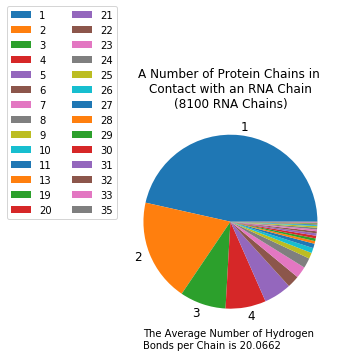

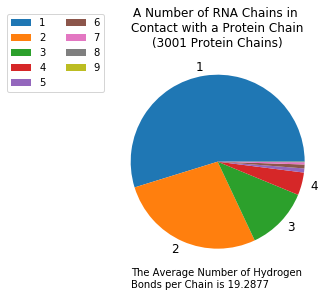

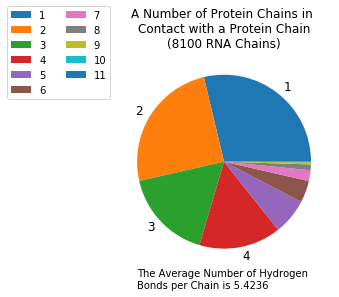

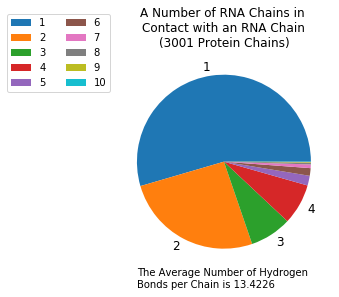

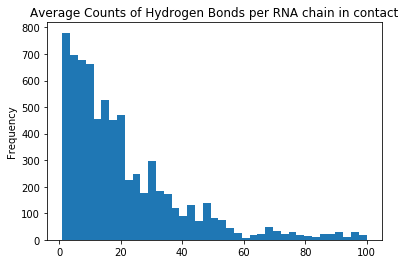

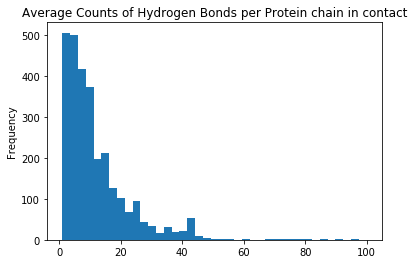

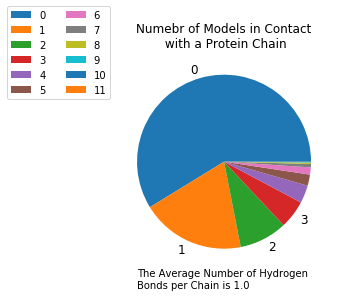

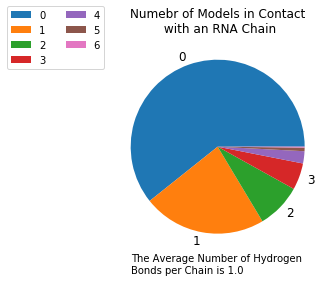

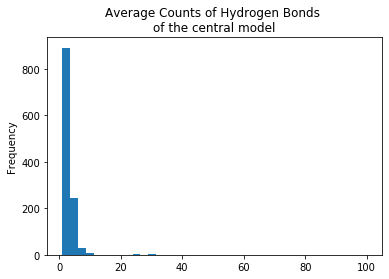

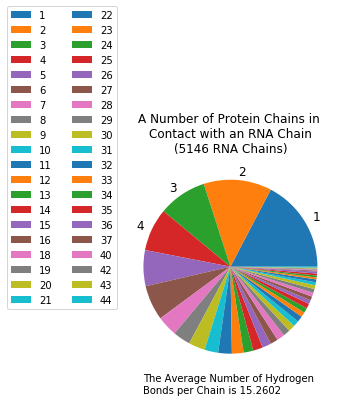

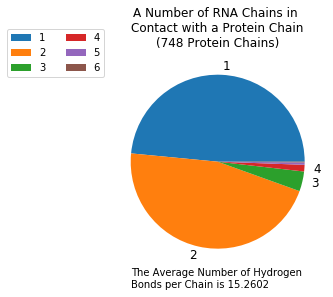

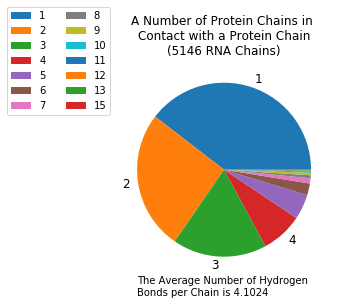

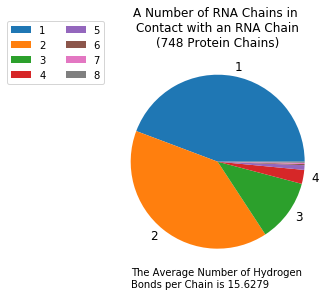

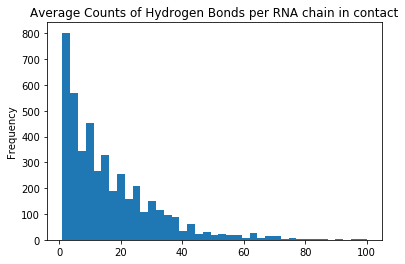

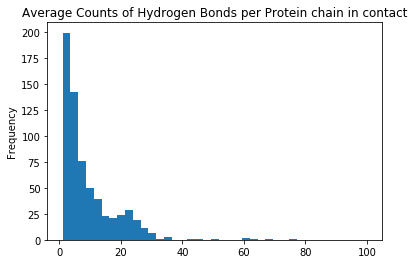

ZeroDivisionError: division by zero

In [17]:
# xprm_list = ['xray/']
xprm_list = ['xray/', 'EM/']
filename = 'chain_summary_calculated.csv'

import pandas as pd
from matplotlib import pyplot as plt
import cufflinks as cf

for expr in xprm_list:
    path = '/Users/tkimura/Desktop/RNP/check_contact/chain_summary/' + expr
    ###################################################
    # histogram
    ####################################################
    def plot_hist(df,column, name):
        fig = plt.figure()
        df[column].plot.hist(bins=39, range=(1,100))
        plt.title(f'{name}')
        plt.show()
        fig.savefig(f'{path}{name}.png', dpi=1200)
    
    ####################################################
    # pie chart (maybe this is better)
    ####################################################
    def plot_pie(df, column, title, name=""):
        avg_hbonds_per_chain = round(sum(df[column.replace('chains', 'hbonds')])/sum(df[column]), 4)
        print(avg_hbonds_per_chain)
        fig = plt.figure()
        if 'model' in column:
            start = 0
        else:
            start = 1
        label_num = len(df[column].value_counts().sort_index()[start:])
        plt.title(f'{title}')
        labellist = []
        for i in range(0, label_num):
            if i <=3:
                labellist.append(df[column].value_counts().sort_index().index[i+start])
            else:
                labellist.append('')
        plt.pie(df[column].value_counts()[start:], labels=labellist, textprops={'fontsize': 12})
        plt.legend(df[column].value_counts().sort_index()[start:].index,loc=5, ncol=2, bbox_to_anchor=(-0, 1))
        plt.text(-1, -1.45, f'The Average Number of Hydrogen \nBonds per Chain is {avg_hbonds_per_chain}')
        plt.show()
        fig.savefig(f'{path}{name}.jpg', dpi=500, bbox_inches="tight")

    file = path + filename
    df = pd.read_csv(file)
    df_p = df.loc[df['type'] == 'p']
    df_r = df.loc[df['type'] == 'r']
    
    # -------------------------------
    # chain counts
    # -------------------------------
    p_chain_counts = df_p['type'].count()
    plot_pie(df_r, 'p_chains', f'A Number of Protein Chains in \nContact with an RNA Chain\n({p_chain_counts} RNA Chains)', 'r_to_np')
    
    r_chain_counts = df_r['type'].count()
    plot_pie(df_p, 'r_chains', f'A Number of RNA Chains in \nContact with a Protein Chain\n({r_chain_counts} Protein Chains)', 'p_to_nr')
    
    p_chain_counts = df_p['type'].count()
    plot_pie(df_p, 'p_chains', f'A Number of Protein Chains in \nContact with a Protein Chain\n({p_chain_counts} RNA Chains)', 'p_to_np')
    
    r_chain_counts = df_r['type'].count()
    plot_pie(df_r, 'r_chains', f'A Number of RNA Chains in \nContact with an RNA Chain\n({r_chain_counts} Protein Chains)', 'r_to_nr')
    
    # 'pdbid', 'chain', 'type', 'r_chains', 'r_hbonds', 'avg_r_hbonds',
    #        'p_chains', 'p_hbonds', 'avg_p_hbonds', 'models', 'models_hbonds'
    
    # -------------------------------
    # avg. hbond counts per chain
    # -------------------------------
    plot_hist(df_p, 'avg_r_hbonds', 'Average Counts of Hydrogen Bonds per RNA chain in contact')
    plot_hist(df_r, 'avg_p_hbonds', 'Average Counts of Hydrogen Bonds per Protein chain in contact')
    
    # -------------------------------
    # models
    # -------------------------------
    plot_pie(df_p, 'models', 'Numebr of Models in Contact\n with a Protein Chain', 'models_per_pchain')
    plot_pie(df_r, 'models', 'Numebr of Models in Contact\n with an RNA Chain', 'models_per_rchain')
    plot_hist(df_r, 'models_hbonds', 'Average Counts of Hydrogen Bonds \nof the central model')
plt.close()